In [2]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install imojify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 MB 8.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gdown
import os

# posts with engagement
# url = 'https://drive.google.com/uc?id=1OGMa55QmLBLFiDGCE5bP32Hm3hIlZNGN'
# posts with engagement
url = 'https://drive.google.com/uc?id=18V3MiiM2aiM_nAZPi5eTom1B0PexbAou'

# url = 'https://drive.google.com/uc?id=1fxYU6Xk7mTISk3ZhgD6coIzK9238uu3s'
# url = 'https://drive.google.com/uc?id=1AbHlv2_bCnVAmmI6Dj0FOyZ-V7kP0m_V'

# apple color

# url = 'https://drive.google.com/uc?id=1Pc0ThySKuZZrSN-OgDnwM2cKpBaj94G_'
output = 'posts.csv'
# os.remove("/kaggle/working/posts.csv")
gdown.download(url, output, quiet=False)

In [2]:
import sys
import json
import pandas as pd
import random
import numpy as np

df_posts = pd.read_csv('posts_cleaned.csv', lineterminator = "\n", parse_dates=['taken_at_timestamp'])
# df_posts = pd.read_csv('posts.csv', lineterminator = "\n", parse_dates=['taken_at_timestamp'])
# df_posts = df_posts.sample(frac = 0.20)

In [9]:
df_posts.columns

Index(['Unnamed: 0', 'id', 'post_id', 'user_name', 'name', 'sponsorsip_label',
       'json_file', 'followers', 'followees', 'posts', 'category', 'bio',
       'email', 'phone', 'comments_disabled', 'dimensions_width',
       'dimensions_height', 'likes', 'comments', 'tagged_accounts',
       'caption_length', 'taken_at_timestamp', 'caption_text', 'mean_like',
       'mean_comment', 'emojis_used', 'polarity', 'subjectivity', 'Type_a',
       'Type_b', 'engagement_rate', 'caption_no_hashtags_emojis', 'detect'],
      dtype='object')

In [13]:
df_posts['comments'].median()

60.0

In [3]:
df_posts.shape

(46386, 33)

In [14]:
lst = []
def categorize(eng_rate):
    label = ''
    if 0 <= eng_rate < 0.001:
        label = 'bad'
    if 0.001 <= eng_rate < 0.01:
        label = 'average'
    if 0.01 <= eng_rate < 0.03:
        label = 'good'
    if 0.03 <= eng_rate < 1:
        label = 'great'
    if eng_rate >= 1:
        label = 'amazing'
    
    return label


In [15]:
df_posts['class_col']  = df_posts['engagement_rate'].apply(lambda x: categorize(x))

In [45]:
df_posts['class_col'].unique()

array(['average', 'good', 'great', 'bad'], dtype=object)

In [44]:
df_posts = df_posts[df_posts['class_col'] != 'amazing']

In [116]:
df_posts.groupby('class_col').size()

class_col
amazing        6
average     8662
bad          622
good       18838
great      18258
dtype: int64

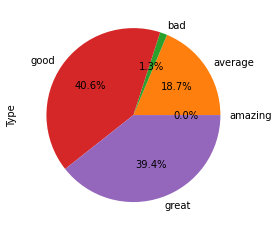

In [17]:
plot = df_posts.groupby('class_col').size().plot(kind='pie',
                                       y = "class_col",
                                       label = "Type",
                                       autopct='%1.1f%%')

fig = plot.get_figure()
fig.savefig("Label_balance.png")

# df_posts = data_downsampled

In [122]:
average_eng = df_posts[df_posts["class_col"] == "average"]
good_eng  = df_posts[df_posts["class_col"] == "good"]
great_eng  = df_posts[df_posts["class_col"] == "great"]
bad_eng  = df_posts[df_posts["class_col"] == "bad"]

from sklearn.utils import resample
average_downsample = resample(average_eng,
             replace=True,
             n_samples=len(bad_eng),
             random_state=42)
good_downsample = resample(good_eng,
             replace=True,
             n_samples=len(bad_eng),
             random_state=42)
great_downsample = resample(great_eng,
             replace=True,
             n_samples=len(bad_eng),
             random_state=42)
print(average_downsample.shape)

(622, 34)


In [123]:
data_downsampled = pd.concat([average_downsample, good_downsample, great_downsample, bad_eng])

average    622
good       622
great      622
bad        622
Name: class_col, dtype: int64


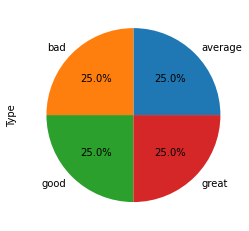

In [125]:
print(data_downsampled["class_col"].value_counts())

data_downsampled.groupby('class_col').size().plot(kind='pie',
                                       y = "class_col",
                                       label = "Type",
                                       autopct='%1.1f%%')

df_posts = data_downsampled

In [34]:
df_posts['engagement_rate']

0        0.007278
1        0.019970
2        0.079818
3        0.073980
4        0.026010
           ...   
46381    0.055449
46382    0.041375
46383    0.012705
46384    0.026467
46385    0.000133
Name: engagement_rate, Length: 46386, dtype: float64

In [39]:
df_posts[df_posts['class_col'] == '']['engagement_rate']

12474    0.01
Name: engagement_rate, dtype: float64

In [27]:
df_posts['class_col']  = pd.Categorical(df_posts['class_col'] )
df_posts['class_col'] = df_posts['class_col'].cat.codes

In [19]:
df_posts['class_col']

0        average
1           good
2          great
3          great
4           good
          ...   
46381      great
46382      great
46383       good
46384       good
46385        bad
Name: class_col, Length: 46386, dtype: object

In [4]:
print(df_posts.columns)
print(df_posts.shape)

Index(['Unnamed: 0', 'id', 'post_id', 'user_name', 'name', 'sponsorsip_label',
       'json_file', 'followers', 'followees', 'posts', 'category', 'bio',
       'email', 'phone', 'comments_disabled', 'dimensions_width',
       'dimensions_height', 'likes', 'comments', 'tagged_accounts',
       'caption_length', 'taken_at_timestamp', 'caption_text', 'mean_like',
       'mean_comment', 'emojis_used', 'polarity', 'subjectivity', 'Type_a',
       'Type_b', 'engagement_rate', 'caption_no_hashtags_emojis', 'detect'],
      dtype='object')
(11596, 33)


In [ ]:
pip install emoji==1.6.3

In [4]:
import emoji

def extract_emojis(s):
    s = str(s)
    return emoji.distinct_emoji_list(s)

#     return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [5]:
df_posts['emojis'] = df_posts['caption_text'].apply(lambda x: extract_emojis(x))    

In [6]:
df_posts['emojis']

0                    [😋, 🙌🏼]
1               [🙀, 🥂, 👯‍♀️]
2                   [👌🏻, ✔️]
3        [💙, 😍, ❤️, 💜, 💚, 💛]
4                         []
                ...         
46381                    [💗]
46382                    [🍮]
46383                    [📸]
46384                [❤️, 🌹]
46385          [💕, 😅, 💙, 🙌🏻]
Name: emojis, Length: 46386, dtype: object

In [7]:
type(df_posts['emojis'][0])

list

In [9]:
from itertools import chain
from collections import Counter

emoji_freq = pd.Series(Counter(chain.from_iterable(x for x in df_posts['emojis'])))

In [10]:
print(emoji_freq.sort_values(ascending = False))
emoji_freq = emoji_freq.sort_values(ascending = False)
emoji_freq = emoji_freq.reset_index(level=0)
emoji_freq = emoji_freq.astype({"index": str})
emoji_freq.head(30)

❤️      4104
✨       3931
😍       3327
📸       2069
💕       1975
        ... 
🖕🏽         1
🏩          1
🚣‍♂️       1
🏇          1
🙇‍♀️       1
Length: 1700, dtype: int64


,index,0
0,❤️,4104
1,✨,3931
2,😍,3327
3,📸,2069
4,💕,1975
5,😂,1859
6,📷,1469
7,🖤,1101
8,🙌🏼,1072
9,🔥,1042


In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import ft2font
from matplotlib.font_manager import ttfFontProperty


import matplotlib.pyplot as pyplot
from matplotlib.font_manager import FontProperties

fpath = '/kaggle/working/font.ttf'
fprop = fm.FontProperties(fname=fpath)

font = ft2font.FT2Font(fpath)
fprop = fm.FontProperties(fname=fpath)

ttfFontProp = ttfFontProperty(font)


fontprop = fm.FontProperties(family='sans-serif',
                            fname=ttfFontProp.fname,
                            size=20,
                            stretch=ttfFontProp.stretch,
                            style=ttfFontProp.style,
                            variant=ttfFontProp.variant,
                            weight=ttfFontProp.weight)

labels = emoji_freq['index'].head(30)
# fig = matplotlib.pyplot.gcf()

# print(labels)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# df = pd.DataFrame({'numbers': [2, 4, 1, 4, 3, 2, 1, 3, 2, 4]})
emoji_freq.head(30).plot(ax=ax, kind='bar', xlabel= 'emojis' , ylabel='frequency')

# plt.xticks(labels)
# ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation=45, fontproperties=fprop)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
# t = ax.text(.5, .25, labels, fontname='/kaggle/working/font.ttf', fontsize=30, ha='center')
# fig.savefig('test2png.png', dpi=100)

plt.show()

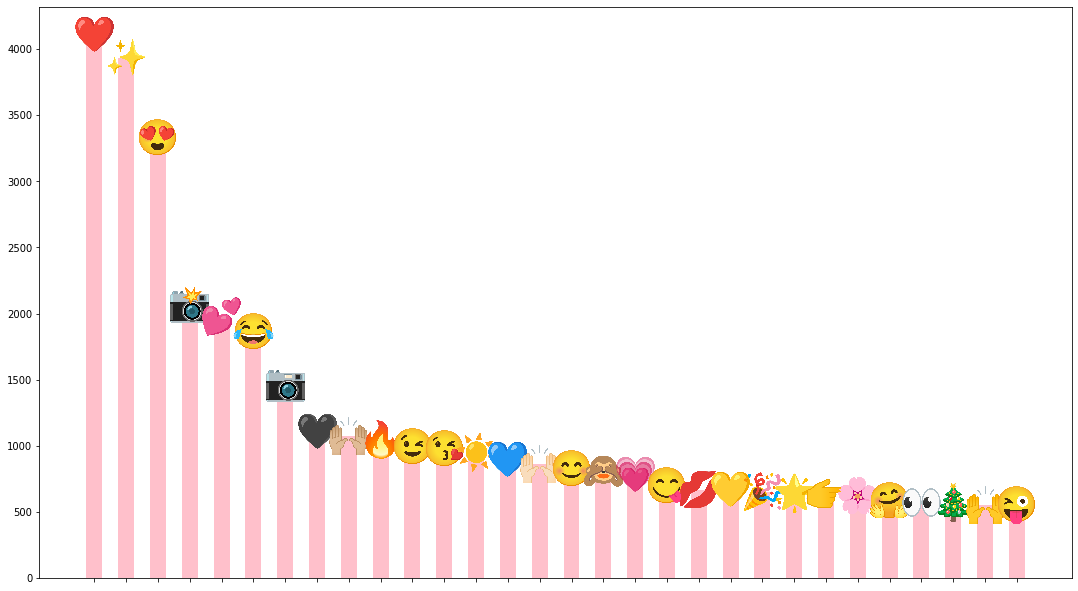

In [13]:
from imojify import imojify
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
def offset_image(cords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.08)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)



emjis = labels = emoji_freq['index'].head(30)
values = emoji_freq[0].head(30)

fig, ax = plt.subplots(figsize=(12,8))
fig.set_size_inches(18.5, 10.5)
ax.bar(range(len(emjis)), values, width=0.5,align="center", color="pink")
ax.set_xticks(range(len(emjis)))
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, ax.get_ylim()[1]+10))

for i, e in enumerate(emjis):
    offset_image([i,values[i]+5], e, ax)
    
plt.savefig('emojis_usage.png')

In [17]:
df_posts[df_posts['engagement_rate']>0.3]['emojis']

104                       [🐿]
452                       [☕]
1250       [👗, 😍, 📸, 👰, 💐, 💁]
1494                      [🖤]
1945              [☺️, ❤️, 😘]
                 ...         
43340    [🍭, 🤷🏼‍♀️, ✨, 👑, 👇🏼]
43704                     [🌸]
43823                  [🎉, ✨]
44285                      []
46356               [🌿, 🌲, 🥰]
Name: emojis, Length: 83, dtype: object

In [ ]:
#  df_cd.groupby(['user_name'])['edge_media_preview_like.count']
df_eng = df_posts[['category', 'engagement_rate' ]]
bp = df_eng.boxplot(by='category')

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,19)})
sns.set(font_scale = 2)

fig, ax = plt.subplots()
sns.boxplot(
    data=df_eng, x="engagement_rate", y="category",
    notch=True, showcaps=False,
#     flierprops={"marker": "o"},
    boxprops={"facecolor": 'pink'},
    medianprops={"color": "pink"},
#     showfliers=False
)

# ax.set_xlim(0,4)
# ax.set_xticks(range(0,0.075))
plt.savefig('categ_eng_outliers.png', bbox_inches='tight')
plt.show()
# plt.xticks([0, 1.5, 2, 2.5, 3, 4], [0, 1.5, 0.05, 0.075, 1, 4])

In [ ]:
df_posts[['taken_at_timestamp']]

In [ ]:
df_posts['date'] = pd.to_datetime(df_posts['taken_at_timestamp'],unit='s')

In [ ]:
df_posts['date']

In [ ]:
df_posts['engagement_rate'].sort_values(ascending = False).head(10)

In [ ]:
weekday_mean = df_posts.groupby(df_posts['date'].dt.day_name())['engagement_rate'].mean()
weekday_max = df_posts.groupby(df_posts['date'].dt.day_name())['engagement_rate'].max()
weekday_median = df_posts.groupby(df_posts['date'].dt.day_name())['engagement_rate'].median()
weekday_min = df_posts.groupby(df_posts['date'].dt.day_name())['engagement_rate'].min()
# print(weekday_mean)
# print(weekday_max)
# print(weekday_median)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)
fig.tight_layout(pad=3.5)

ax[0, 0].plot(weekday_min, '#9ADCFF',  linewidth=5) #row=0, col=0
ax[1, 0].plot(weekday_max, '#FAAB78', linewidth=5) #row=1, col=0
ax[0, 1].plot(weekday_median, '#FFB2A6', linewidth=5) #row=0, col=1
ax[1, 1].plot(weekday_mean, '#FF8AAE', linewidth=5) #row=1, col=1

print(ax)
ax[0, 0].set_xticklabels(weekday_min.index, rotation = 20, ha="right")
ax[1, 0].set_xticklabels(weekday_min.index, rotation = 20, ha="right")
ax[0, 1].set_xticklabels(weekday_min.index, rotation = 20, ha="right")
ax[1, 1].set_xticklabels(weekday_min.index, rotation = 20, ha="right")


ax[0, 0].title.set_text("Min engagement rate of weekdays")
ax[1, 0].title.set_text("Max engagement rate of weekdays")
ax[0, 1].title.set_text("Median engagement rate of weekdays")
ax[1, 1].title.set_text("Mean engagement rate of weekdays")

plt.savefig('eng_weekday_means.png')

plt.show()


In [ ]:

from matplotlib import pyplot as plt
import numpy as np


seaborn.set(rc={'figure.figsize':(20,19)})
seaborn.set(font_scale = 2)


group_weekday = df_posts.groupby(df_posts['date'].dt.day_name())['engagement_rate']
res_weekday = g.apply(lambda x: x.sort_values(ascending=False).head(3))
weekdays_three_engs = res_weekday.reset_index(name='val').groupby('date')['val']

print(weekdays_three_engs)

fig, ax = plt.subplots()

idx = np.asarray([i for i in range(7)])

print(idx)

width = 0.2

# color = ["#FFE6E6"]*3 + ["#F2D1D1"]*3 + ["#DAEAF1"]*3 + ["#C6DCE4"]*3  

ax.bar(idx, weekdays_three_engs.first(), width=width, color = "#54BAB9")
ax.bar(idx+width, weekdays_three_engs.nth(1), width=width, color = "#E9DAC1")
ax.bar(idx+2*width, weekdays_three_engs.nth(2), width=width, color = "#9ED2C6")
ax.set_facecolor('#eaeaf2')

ax.set_xticks(idx)
ax.set_xticklabels(weekdays_three_engs.first().index, rotation=40)

ax.set_xlabel('Hours of Day')
ax.set_ylabel('Engagement Rate')

fig.tight_layout()
plt.savefig('weekday_eng.png')
plt.show()

In [ ]:

g_hour_weekday = df_posts.groupby(df_posts['date'].dt.hour)['engagement_rate']
res_hour_weekday = g_hour_weekday.apply(lambda x: x.sort_values(ascending=False).head(3))
print(res_hour_weekday)

In [ ]:
g_hour_weekday = df_posts.groupby(df_posts['date'].dt.hour)['engagement_rate']
res_hour = g_hour.apply(lambda x: x.sort_values(ascending=False).head(3))
print(res_hour)

In [ ]:
xx = res_hour.reset_index(name='val').groupby('date')['val']


In [ ]:
xx.first()

In [ ]:
xx.first().index

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
import matplotlib.dates as mdates

seaborn.set() #make the plots look pretty

# df = pd.DataFrame({'value': value, 'type': type})
# df['dummy'] = 1
# ag = df.groupby(['value','type']).sum().unstack()
# ag.columns = ag.columns.droplevel()
seaborn.set(rc={'figure.figsize':(20,19)})
seaborn.set(font_scale = 2)

fig, ax = plt.subplots()
color = ["#FFE6E6"]*3 + ["#F2D1D1"]*3 + ["#DAEAF1"]*3 + ["#C6DCE4"]*3  

# # Text in the x axis will be displayed in 'YYYY-mm' format.
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%h'))
# # Rotates and right-aligns the x labels so they don't crowd each other.
# for label in ax.get_xticklabels(which='major'):
#     label.set(rotation=30, horizontalalignment='right')

ax.xaxis_date()


plt.locator_params(axis='x', nbins=24)

res_hour_weekday.plot(kind = 'bar',  width = 1, color = color)



# plt.bar(res_hour_weekday.index,res_hour_weekday, color = color, align="center")  

# from matplotlib import pyplot as plt
# colors = ['r']*3 + ['b']*3 + ['g']*3
# barlist = plt.bar(xrange(15), xrange(15))
# for item, color in zip(barlist, colors):
#      item.set_color(color)
# plt.show()

# res_hour_weekday.plot.hist()
# plt.show()

In [ ]:

from matplotlib import pyplot as plt
import numpy as np

##generating some data
# years = range(len(years)
# data1 = np.random.rand(len(years))
# data2 = np.random.rand(len(years))

# diabete = {key: val for key,val in zip(years, data1)}
# not_diabete = {key: val for key,val in zip(years, data2)}

seaborn.set(rc={'figure.figsize':(20,19)})
seaborn.set(font_scale = 2)

##the actual graph:
fig, ax = plt.subplots()

idx = np.asarray([i for i in range(24)])

print(idx)

width = 0.2

# color = ["#FFE6E6"]*3 + ["#F2D1D1"]*3 + ["#DAEAF1"]*3 + ["#C6DCE4"]*3  

ax.bar(idx, xx.first(), width=width, color = "#54BAB9")
ax.bar(idx+width, xx.nth(1), width=width, color = "#E9DAC1")
ax.bar(idx+2*width, xx.nth(2), width=width, color = "#9ED2C6")
ax.set_facecolor('#eaeaf2')

ax.set_xticks(idx)
ax.set_xticklabels(xx.first().index, rotation=65)
# ax.legend(['Fir', 'Non-Diabete'])
ax.set_xlabel('Hours of Day')
ax.set_ylabel('Engagement Rate')

fig.tight_layout()
plt.savefig('hours_eng.png')
plt.show()

In [ ]:
import seaborn as sns

# Create figure with three axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

# seaborn.set(rc={'figure.figsize':(20,19)})
seaborn.set(font_scale = 1.5)

fig.tight_layout(pad=3.5, )
# Plot violin plot on axes 1
# ax1.violinplot(df_posts['likes'], showmedians=True)
sns.violinplot(ax=ax1, data=df_posts[df_posts['likes']<100000]['likes'],
                    palette="Set2", split=True,
                    scale="count", inner="quartile")
ax1.set_title('Likes')

# Plot violin plot on axes 2
# ax2.violinplot(df_posts['comments'], showmedians=True)
sns.violinplot(ax=ax2, data=df_posts[df_posts['comments']<2000]['comments'],
                    palette="Set2", split=True,
                    scale="count", inner="quartile")
ax2.set_title('Coments')

# Plot violin plot on axes 3
# ax3.violinplot(df_posts['engagement_rate'], showmedians=True)
ac = sns.violinplot(ax=ax3, data=df_posts[df_posts['engagement_rate']<0.3]['engagement_rate'], 
                    palette="Set2", split=True,
                    scale="count", inner="quartile")
ax3.set_title('Engagement Rate')

for l in ax.lines:
    ac.text(l.get_data()[0][l.get_data()[0].nonzero()][0], l.get_data()[1][0], f'{l.get_data()[1][0]:.0f}',size='large') 

plt.savefig('violin_distribution.png')

plt.show()

In [ ]:
# {tag.strip("#") for tag in tags.split() if tag.startswith("#")}
# set(['announcement', 'rocks', 'stackoverflow'])

# df_posts['hashtag'] = np.array(df_posts['caption_text'].str.findall(r'#.*?(?=\s|$)'))
# df_posts['hashtags'] = df_posts['caption_text'].apply(lambda x: x.strip('#'))

In [ ]:
# df_posts['hashtag']

In [ ]:
# type(df_posts['hashtag'][0])

In [ ]:
# print(hashtags_freq)

In [ ]:
import re

def extract_hashtags(s):
    s = str(s)
    return re.findall(r"#(\w+)", s)
    
    
df_posts['hashtags'] = df_posts['caption_text'].apply(lambda x: extract_hashtags(x))    

In [ ]:
df_posts['hashtags']

In [ ]:
from itertools import chain
from collections import Counter

hashtags_freq = pd.Series(Counter(chain.from_iterable(x for x in df_posts['hashtags'])))

In [ ]:
print(hashtags_freq.sort_values(ascending = False))
hashtags_freq = hashtags_freq.sort_values(ascending = False)
hashtags_freq = hashtags_freq.reset_index(level=0)
hashtags_freq = hashtags_freq.astype({"index": str})
hashtags_freq=hashtags_freq.rename(columns = {0:'frequencies', 'index':'hashtags'})
hashtags_freq.head(30)

In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import ft2font
from matplotlib.font_manager import ttfFontProperty
import seaborn as sns



# labels = hashtags_freq['index'].head(30)

fig, ax = plt.subplots()
fig.set_size_inches(12, 10)


# sns.set_context('paper')

# # crashes = sns.load_dataset('car_crashes').sort_values('total', ascending = False)
# f, ax = plt.subplots(figsize = (6,15))
# sns.set_color_codes('pastel')
# sns.barplot(x = 'frequencies', y = "hashtags", data = hashtags_freq.head(30),
#             color = 'b', edgecolor = 'w')
# sns.set_color_codes('muted')
# # sns.barplot(x = 'alcohol', y = 'abbrev', data = crashes,
# #             label = 'Alcohol-involved', color = 'b', edgecolor = 'w')
# ax.legend(ncol = 2, loc = 'lower right')
# sns.despine(left = True, bottom = True)


# hashtags_freq.head(30).plot(ax=ax, kind='bar', xlabel= 'Hashtags' , ylabel='frequency', color= '#D885A3')


plt.barh(hashtags_freq['hashtags'].head(30), hashtags_freq['frequencies'].head(30), height=0.5, color= "pink" )
 
    
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# sns.barplot(x = 'frequencies', y = "index", data = hashtags_freq)

# plt.xticks(labels)
# ax.set_xticks(labels)
# ax.set_xticklabels(labels, rotation=90)

# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.tick_params(axis='both', which='minor', labelsize=20)
# t = ax.text(.5, .25, labels, fontname='/kaggle/working/font.ttf', fontsize=30, ha='center')
# fig.savefig('test2png.png', dpi=100)
plt.savefig('hashtag_freq.png')
plt.show()

In [ ]:
tophastags = hashtags_freq['hashtags'].head(30).tolist()
# print(tophastags)
df_eng_top_hastags = df_posts[ df_posts["hashtags"].apply(lambda v: bool(len( list(set(v).intersection(tophastags)))))]['engagement_rate']
print(df_eng_top_hastags.sort_values(ascending = False))

In [15]:
#complete text cleaning
import re

# df_posts['caption_no_hashtags_emojis'] = df_posts['caption_text'].apply(lambda x: re.sub(r"#(\w+)", ' ', str(x)))
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_text'].astype(str).apply(lambda x: str(x).encode('ascii', 'ignore').decode('ascii'))

filter_char = lambda c: ord(c) < 256
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda s: ''.join(filter(filter_char, s)))

# pattern_tagged = '(?:^|[^\w])(?:@)([A-Za-z0-9_](?:(?:[A-Za-z0-9_]|(?:\.(?!\.))){0,28}(?:[A-Za-z0-9_]))?)'

#tagged ones
pattern_tagged  = re.compile("(?:^|[^\w])(?:@)([A-Za-z0-9_](?:(?:[A-Za-z0-9_]|(?:\.(?!\.))){0,28}(?:[A-Za-z0-9_]))?)",flags = re.UNICODE)
df_posts['caption_no_hashtags_emojis']  = df_posts['caption_no_hashtags_emojis'].apply(lambda x: pattern_tagged.sub(r' ', str(x))) 
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda x: x.lower())
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda x: re.sub('\n', ' ', x))
#numbers
# df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].str.replace('\d+', '')
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].str.lower().str.replace('[^\w\s]',' ')
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda x: x.strip())
#one letter words
# df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


In [6]:
df_posts['caption_no_hashtags_emojis']

0        mi chiedete sempre informazioni riguardo alle ...
1        its march madness   check your bracket and gra...
2        had the best staycation ever with   just a clu...
3        monday done  full look from  check out the coo...
4        we played a game each day to find cars that ma...
                               ...                        
57590    easy like sunday morning  i jeyla s have my he...
57591    i literally just devoured 7 vanilla custard fi...
57592    gotta catch  em all  here s a look at the  thu...
57593    new get ready with me video just went up   i a...
57594    ilove my job because i get to work in coffee s...
Name: caption_no_hashtags_emojis, Length: 57595, dtype: object

In [16]:
import re
from textblob import TextBlob
from textblob import Word

#repeated characters
rx = re.compile(r'([^\W\d_])\1{2,}')

df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].str.replace('\d+', '')   
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda stri: re.sub(r'^(\S)\1{3,}\S*\s', '', stri)) 
# df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda stri: re.sub(r'[^\W\d_]+', lambda x: Word(rx.sub(r'\1', x.group())).correct() if rx.search(x.group()) else x.group(), stri)) 
# removing chars that are not words
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].str.replace('[^a-zA-Z]', ' ') 
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda x: x.strip())



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == "":


In [17]:
#repeated letters
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda stri: re.sub(r'[^\w\s]|(.)(?=\1)', '', stri)) 
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda x: x.strip())


In [18]:
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
df_posts['caption_no_hashtags_emojis']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        mi chiedete sempre informazioni riguardo ale p...
1        its march madnes check your bracket and grab s...
2        had the best staycation ever with just clue ch...
3        monday done ful lok from check out the col col...
4        we played game each day to find cars that matc...
                               ...                        
57590    easy like sunday morning jeyla have my head in...
57591     literaly just devoured vanila custard filed w...
57592    gota catch em al here lok at the thunderbolt p...
57593    new get ready with me video just went up also ...
57594    ilove my job because get to work in cofe shops...
Name: caption_no_hashtags_emojis, Length: 57595, dtype: object

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

from langdetect import detect
df_posts['detect'] = df_posts['caption_no_hashtags_emojis'].apply(det)
df_posts = df_posts[df_posts['detect'] == 'en']

In [21]:
df_posts.to_csv('posts_cleaned.csv')

In [10]:
df_posts['caption_no_hashtags_emojis']

1        march madnes check bracket grab snacks love ni...
2        best staycation ever clue champagne pilow figh...
3                  monday done ful lok check col colection
4        played game day find cars matched clothes love...
5        seriously ritz peanut buter brownies kryptonit...
                               ...                        
57590    easy like sunday morning jeyla head clouds dre...
57591    literaly devoured vanila custard filed wafles ...
57592    gota catch em al lok thunderbolt project frgmt...
57593    new get ready video went also reviewed new kit...
57594    ilove job get work cofe shops almost every sin...
Name: caption_no_hashtags_emojis, Length: 44150, dtype: object

In [11]:
new_df = df_posts['caption_no_hashtags_emojis'].str.split(expand=True).stack().value_counts().reset_index() 
new_df.columns = ['Word', 'Frequency']
new_df.head(20)

,Word,Frequency
0,al,12502
1,new,7640
2,one,7162
3,love,6824
4,get,6793
5,like,6344
6,im,6165
7,day,6080
8,time,5429
9,link,5249


In [ ]:
df_posts['caption_no_hashtags_emojis']

'and'

In [1]:
df_posts.shape

NameError: name 'df_posts' is not defined

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(binary=True)
X = tfidf.fit_transform(df_posts['caption_no_hashtags_emojis']).astype('float32')
# X_test = tfidf.transform(test_text).astype('float16')
tfidf_tokens = tfidf.get_feature_names_out()

import pandas as pd

result = pd.DataFrame(
    data=X.toarray(), 
#     index=["Doc1", "Doc2", "Doc3", "Doc4"], 
    columns=tfidf_tokens,
    dtype='float'
)

result

,ab,aba,abapatio,abathome,abc,abdk,abdominal,abeautifulmes,abeg,abel,...,zvbn,zvnv,zvuk,zvxn,zwb,zwdh,zwsx,zwycizcw,zx,zxbi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib import pyplot as plt
import seaborn as sns
import eli5

# X_train, X_test, y_train, y_test = train_test_split(df_posts["caption_no_hashtags_emojis"], df_posts['label'], random_state = 0)
# # print(X_train)
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)
# # %%time
# X_train_text = text_transformer.fit_transform(X_train)
# X_test_text = text_transformer.transform(X_test)

X = text_transformer.fit_transform(df_posts['caption_no_hashtags_emojis']).astype('float32')
tfidf_tokens = text_transformer.get_feature_names_out()

result = pd.DataFrame(
    data=X.toarray(), 
#     index=["Doc1", "Doc2", "Doc3", "Doc4"], 
    columns=tfidf_tokens,
    dtype='float'
)

result

In [6]:
result = result.astype(float)
result

In [9]:
import pandas as pd
  
df1 = pd.DataFrame({'id': ['A01', 'A02', 'A03', 'A04'],
                    'Name': ['ABC', 'PQR', 'DEF', 'GHI']})
  
df3 = pd.DataFrame({'City': ['MUMBAI', 'PUNE', 'MUMBAI', 'DELHI'],
                    'Age': ['12', '13', '14', '12']})
  
# the default behaviour is join='outer'
# inner join
  
result = pd.concat([df1, df3], axis=1, join='inner')
display(result)

,id,Name,City,Age
0,A01,ABC,MUMBAI,12
1,A02,PQR,PUNE,13
2,A03,DEF,MUMBAI,14
3,A04,GHI,DELHI,12


In [35]:
df_posts = pd.concat([result,df_posts], axis=1, join='inner')
del result

In [ ]:
df_posts2.to_csv('posts_tf.csv')

In [40]:
df_posts.columns

Index(['ab', 'aba', 'abandon', 'abandoned', 'abandones', 'abascal',
       'abathingape', 'abathome', 'abcb', 'abckidsexpo',
       ...
       'dimensions_width', 'dimensions_height', 'caption_length', 'polarity',
       'subjectivity', 'Type_a', 'Type_b', 'mean_comment', 'mean_like',
       'labels'],
      dtype='object', length=38750)

In [44]:
X.toarray()

ValueError: Output dtype not compatible with inputs.

In [43]:
print(X[1000])

  (0, 3338)	0.1193
  (0, 3622)	0.2439
  (0, 4209)	0.0871
  (0, 4302)	0.0903
  (0, 4985)	0.1787
  (0, 8394)	0.1738
  (0, 8624)	0.1855
  (0, 9018)	0.1553
  (0, 9023)	0.1558
  (0, 10014)	0.204
  (0, 10073)	0.1821
  (0, 10404)	0.1826
  (0, 11217)	0.2054
  (0, 17001)	0.1727
  (0, 17024)	0.212
  (0, 17663)	0.0959
  (0, 18050)	0.1154
  (0, 22632)	0.1296
  (0, 22787)	0.1364
  (0, 30199)	0.1261
  (0, 31016)	0.1887
  (0, 31968)	0.1849
  (0, 32182)	0.0854
  (0, 33775)	0.2439
  (0, 34095)	0.11615
  (0, 35306)	0.1416
  (0, 36241)	0.1299
  (0, 37213)	0.0872
  (0, 43033)	0.1364
  (0, 43736)	0.1453
  (0, 43766)	0.1556
  (0, 44914)	0.1627
  (0, 45239)	0.1345
  (0, 47327)	0.1426
  (0, 49827)	0.1132
  (0, 50734)	0.10693
  (0, 52085)	0.141
  (0, 53737)	0.07965
  (0, 54429)	0.1742
  (0, 56988)	0.0965
  (0, 57668)	0.1545
  (0, 57894)	0.102
  (0, 57996)	0.0964
  (0, 58738)	0.0972


In [ ]:
import emoji

def give_emoji_free_text(text):
#     allchars = [str for str in text]
    text = str(text)
    emoji_list = emoji.distinct_emoji_list(text)
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
        
    return clean_text
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" #emotions
                           u"\U0001F300-\U0001F5FF" #sumbols and pictographs
                           u"\U0001F680-\U0001F6FF" #transport and map symbols
                           u"\U0001F1E0-\U0001F1FF" #flags
                           u"\U00002702-\U000027B0"  
                           u"\U000024C2-\U0001F251" 

                           "]+",flags = re.UNICODE)
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].apply(lambda s:  give_emoji_free_text(s))
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_no_hashtags_emojis'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df_posts['caption_no_hashtags_emojis'] = df_posts['caption_text'].apply(lambda x: emoji_pattern.sub(r'', str(x)))

df_posts['caption_no_hashtags_emojis'] 

In [34]:
cols =['sponsorsip_label', 'followers', 'followees', 'posts', 'comments_disabled', 'dimensions_width',
       'dimensions_height',  'caption_length', 'polarity', 'subjectivity', 'Type_a', 
       'Type_b', 'mean_comment', 'mean_like', 'class_col']

dtypes_dict = {
    'sponsorsip_label': 'bool',
    'followers': 'float',
    'followees': 'float',
    'posts': 'float',
    'category': 'category',
    'comments_disabled': 'bool',
    'dimensions_height': 'int64',
    'dimensions_width': 'int64',
    'tagged_accounts': 'int64', 
    'caption_length': 'int64',
    'emojis_used': 'bool',
    'polarity': 'float',
    'subjectivity': 'float', 
    'Type_a': 'bool',
    'Type_b': 'bool',
    'mean_comment': 'float',
    'mean_like': 'float',
    'labels': 'category'
    
 }


# df_posts_learn = df_posts.sort_values(['taken_at_timestamp'],ascending=False).groupby('user_name').head(14)
df_posts = df_posts[cols]

In [22]:
df_posts['labels']

,labels,labels
1,0.0,good
13,0.0,great
19,0.0,average
26,0.0,good
38,0.0,great
...,...,...
9236,0.0,great
9237,0.0,good
9253,0.0,great
9269,0.0,great


In [21]:
df_posts.columns

Index(['ab', 'aba', 'abaf', 'abandoned', 'abathingape', 'abathome', 'abc',
       'abdominal', 'abdul', 'abeautifulmes',
       ...
       'dimensions_width', 'dimensions_height', 'caption_length', 'polarity',
       'subjectivity', 'Type_a', 'Type_b', 'mean_comment', 'mean_like',
       'labels'],
      dtype='object', length=39194)

In [ ]:
df_posts_learn.dropna()
df_posts_learn.head()
print(df_posts_learn.shape)

In [ ]:
df_posts_learn = df_posts_learn[df_posts_learn['sponsorsip_label'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['followers'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['followees'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['posts'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['category'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['comments_disabled'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['dimensions_height'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['dimensions_width'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['tagged_accounts'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['caption_length'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['emojis_used'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['polarity'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['Type_a'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['Type_b'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['mean_comment'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['mean_like'].apply(lambda x: not pd.isnull(x))]
df_posts_learn = df_posts_learn[df_posts_learn['engagement_rate'].apply(lambda x: not pd.isnull(x))]

In [ ]:
print(df_posts_learn.shape)

In [ ]:
df_posts_learn.head()
# df_posts_learn.shape

In [ ]:
df_posts_learn['category'].unique()

In [ ]:
df_posts_learn = df_posts_learn.astype(dtypes_dict)

In [ ]:
from sklearn import preprocessing


#creating instance of one-hot-encoder
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df_posts_learn[['category']]).toarray() , index=df_posts_learn.index)

print(encoder_df)
#merge one-hot encoded columns back with original DataFrame
df_posts_learn = df_posts_learn.join(encoder_df)

In [ ]:
df_posts_learn.head()

In [ ]:
print(df_posts_learn['engagement_rate'])

In [ ]:
df_posts_learn['engagement_rate']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()


# dtypes_dict = {
#     'sponsorsip_label': 'bool',
#     'followers': 'int64',
#     'followees': 'int64',
#     'posts': 'int64',
#     'category': 'category',
#     'comments_disabled': 'bool',
#     'dimensions_height': 'int32',
#     'dimensions_width': 'int32',
#     'tagged_accounts': 'int32', 
#     'caption_length': 'int32',
#     'emojis_used': 'bool',
#     'polarity': 'int32',
#     'subjectivity': 'int32', 
#     'Type_a': 'bool',
#     'Type_b': 'bool',
#     'engagement_rate': 'int32'
    
#  }


df_posts_learn[['followers', 'followees', 'posts', 'caption_length', 'mean_comment', 'mean_like']] = scaler.fit_transform(df_posts_learn[['followers', 'followees', 'posts', 'caption_length', 'mean_comment', 'mean_like']])
# df_posts_learn[['mean_comment', 'mean_like']] = scaler.fit_transform(df_posts_learn[['mean_comment', 'mean_like']])

In [ ]:
df_posts_learn

In [ ]:
df_posts_learn.drop('category', inplace=True, axis=1)
# df_posts_learn.drop('followees', inplace=True, axis=1)
# df_posts_learn.drop('dimensions_width', inplace=True, axis=1)
# df_posts_learn.drop('dimensions_height', inplace=True, axis=1)
# df_posts_learn.drop('tagged_accounts', inplace=True, axis=1)
# df_posts_learn.drop('emojis_used', inplace=True, axis=1)
# df_posts_learn.drop('comments_disabled', inplace=True, axis=1)
# df_posts_learn.drop('Type_a', inplace=True, axis=1)
# df_posts_learn.drop('Type_b', inplace=True, axis=1)
df_posts_learn

In [ ]:
# shorten engagement rate
import pandas as pd
import math

to_places = 3 

def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n

df_posts_learn['engagement_rate'] = df_posts_learn['engagement_rate'].astype(float).apply(lambda number: truncate(number, to_places))

In [ ]:
df_posts_learn.sort_values('engagement_rate')['engagement_rate']

In [ ]:
df_posts_learn['engagement_rate'] = df_posts_learn['engagement_rate']*100

In [ ]:
print(df_posts_learn.shape)

In [ ]:
print(df_posts_learn['engagement_rate'].describe())
print(df_posts_learn['engagement_rate'].median())

In [ ]:
import seaborn as sns


sns.set(rc={'figure.figsize':(20,18)})

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,18

g = sns.displot(df_posts_learn, x="engagement_rate", kind="kde")
g.fig.set_size_inches(15,15)

In [ ]:
df_posts_learn = df_posts_learn[df_posts_learn['engagement_rate']<0.03]

In [ ]:
from scipy import stats

df_posts_learn[(np.abs(stats.zscore(df_posts_learn['engagement_rate'])) < 3)]

In [ ]:
# Learn

In [9]:
import matplotlib.pyplot as plt

def plot_prediction(test_labels, test_predictions):
  fig, ax = plt.subplots(figsize=(8,4))
  plt.scatter(test_labels, test_predictions, alpha=0.6, 
              color='#149c8e', lw=1, ec='#149c8e')
  lims = [0,10000 ]

  plt.plot(lims, lims, lw=1, color='black')
  plt.ticklabel_format(useOffset=False, style='plain')
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.xlim(lims)
  plt.ylim(lims)

  plt.tight_layout()
  plt.show()


In [ ]:
df_posts['mean_like']

In [ ]:
lik = df_posts[df_posts['mean_like']<5000]

fig, ax = plt.subplots(figsize=(20,20))
plt.scatter(lik['mean_like'], lik['likes'],
              color='#149c8e')
# plt.xlim([0,5000])

In [ ]:
df_posts.groupby('user_name').ngroups

In [ ]:
df_posts_learn = df_posts_learn.drop_duplicates() 
# Generate data and plot
df_posts_learn = df_posts_learn.sample(frac=1)

In [ ]:
df_posts_learn[df_posts_learn[14].apply(lambda x: pd.isnull(x))]

In [10]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.6.4


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(df_posts["caption_no_hashtags_emojis"], df_posts['engagement_rate'], random_state = 0)
del df_posts
# y_train= y_train.astype('int')
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [4]:
X_train_tfidf.shape

(34789, 80917)

In [15]:
from sklearn.model_selection import train_test_split

# print('dataset\'s shape: ' + str(df_posts.shape))

# x = result
# del result
y = df_posts['engagement_rate']


x = df_posts.loc[:, df_posts.columns != 'engagement_rate']
y = df_posts['engagement_rate']
del df_posts

print('x\'s shape: ' + str(x.shape))
print('y\'s shape: ' + str(y.shape))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)



y's shape: (2905,)


In [ ]:
# X_train = X_train.to_numpy() 
# X_test = X_test.to_numpy() 
# y_train = X_train.to_numpy() 
# y_test = y_test.to_numpy() 

In [17]:

def build_model(x_mod):
#     print(x_mod)
    print(x_mod.shape[1])
    model = keras.Sequential([
    keras.layers.Input(shape=(x_mod.shape[1],)),                  
    keras.layers.Dense(44032, activation=tf.nn.relu),
    keras.layers.Dense(34032, activation=tf.nn.relu),
    keras.layers.Dense(24032, activation=tf.nn.relu),
    keras.layers.Dense(14032, activation='softmax'),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(150, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(1)
    ], name="MLP_model")

    

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse', 'mae', 'accuracy'])
    return model


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

target_scaler = MinMaxScaler()

# print(y_train)
# print(y_test)


y_train_reshaped = y_train.values.reshape(-1, 1) 
target_scaler.fit(y_train_reshaped)
y_train_reshaped = target_scaler.transform(y_train_reshaped)
y_test_reshaped = y_test.values.reshape(-1, 1) 
y_test_reshaped = target_scaler.transform(y_test_reshaped)
# print(y_train_reshaped)
# print(y_test_reshaped)


In [18]:
X_train = np.asarray(X_train).astype('float32')

In [ ]:
model = build_model(X_train)
model.summary()
# print(X_train)
# print(y_train.to_numpy())

#358
history_ann = model.fit(X_train, y_train, epochs=50,
                    validation_split=0.2, verbose=0)

In [36]:
df_posts['class_col']

0       average
7         great
21      average
23      average
39         good
         ...   
9267    average
9268       good
9269      great
9271      great
9276    average
Name: class_col, Length: 1916, dtype: object

In [134]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from matplotlib import pyplot as plt
import seaborn as sns
import eli5

# del y_train
# X_train, X_test, y_train, y_test = train_test_split(df_posts.loc[:, df_posts.columns != 'class_col'], df_posts['class_col'], random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(df_posts['caption_text'], df_posts['class_col'], random_state = 0)
# print(X_train)


text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)
# %%time
X_train_text = text_transformer.fit_transform(X_train)
# y_train = df_posts['class_col']
X_test_text = text_transformer.transform(X_test)

In [24]:
print(y_train.shape)
print(X_test_text.shape)
print(X_train.shape)
y_train

(34789,)
(11597, 150000)
(34789,)


32289       good
30735      great
23546       good
39145      great
12306      great
          ...   
21243       good
45891      great
42613    average
43567    average
2732        good
Name: class_col, Length: 34789, dtype: object

In [30]:
print(df2)

['good' 'great' 'average' 'bad' '']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import time
import re

seed = 101
model = SGDRegressor(loss='squared_loss', penalty='l2', random_state=seed, max_iter=5)
params = {'penalty':['none','l2','l1'],
          'alpha':[1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 0.1]}
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  n_jobs=1,
                  cv=5,
                  verbose=3)
start = time.time()
gs.fit(X_train_text, y_train)
end = time.time()
print('Time to train model: %0.2fs' % (end -start))

In [135]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
# %%time
cv_results = cross_val_score(logit, X_train_text, y_train, cv=skf, scoring='f1_micro')

In [136]:
cv_results, cv_results.mean()

(array([0.51871658, 0.52815013, 0.54959786, 0.54959786, 0.59517426]),
 0.5482473369557426)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [49]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_text, y_train)

MultinomialNB()

In [50]:
y_pred = naive_bayes_classifier.predict(X_test_text)

In [52]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=[ 'average', 'good', 'great','bad']))

              precision    recall  f1-score   support

     average       0.79      0.24      0.37      2150
        good       1.00      0.03      0.06       156
       great       0.54      0.77      0.63      4706
         bad       0.70      0.63      0.66      4583

    accuracy                           0.61     11595
   macro avg       0.76      0.42      0.43     11595
weighted avg       0.65      0.61      0.59     11595



In [68]:

from collections import Counter
print(y_pred)

print(Counter(y_test).keys()) # equals to list(set(words))
print(Counter(y_test).values()) # counts the elements' frequency
print(set(y_pred))

['good' 'good' 'great' ... 'good' 'great' 'great']
dict_keys(['good', 'great', 'average', 'bad'])
dict_values([4706, 4583, 2150, 156])
{'bad', 'good', 'average', 'great'}


In [75]:
from sklearn.metrics import accuracy_score
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

Confusion matrix:
[[ 515    0 1387  248]
 [  49    5   69   33]
 [  83    0 3639  984]
 [   6    0 1675 2902]]
Accuracy: 0.6089693833548944


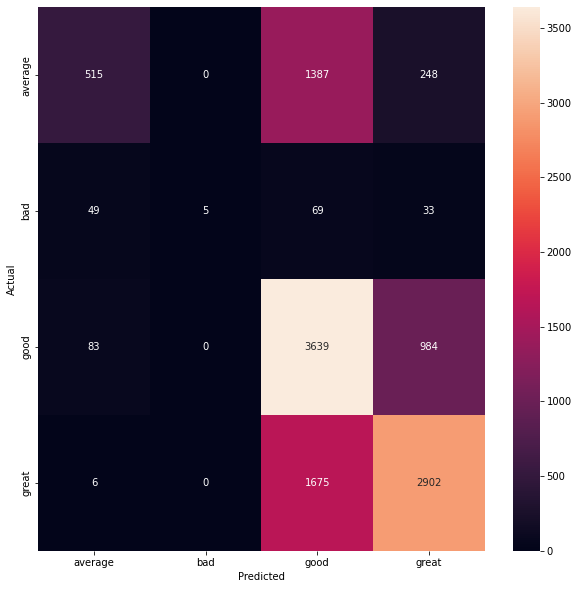

In [69]:
from sklearn.metrics import confusion_matrix
import numpy as np
import scipy.sparse as sp

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
# print(df_lables)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=[ 'average', 'bad', 'good','great'],
            yticklabels=[ 'average', 'bad', 'good','great'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# clf.score(X_test_transformed, y_test)

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# X_train, X_test, y_train, y_test = train_test_split(df_posts[["caption_text", "mean_like", 'followers', 'followees', 'posts', 
#                                   'comments_disabled', 'dimensions_width','dimensions_height',  'caption_length', 'polarity', 
#                                   'subjectivity', 'Type_a', 'Type_b', 'mean_comment']], df_posts['class_col'], random_state = 0)
#followees, 'comments_disabled','caption_length', 'polarity',  'subjectivity', 'Type_a', 'Type_b'
X_train, X_test, y_train, y_test = train_test_split(df_posts[["caption_no_hashtags_emojis", "mean_like", 'followers', 'followees', 'posts', 
                                  'comments_disabled', 'dimensions_width','dimensions_height', 'caption_length', 'polarity', 
                                  'subjectivity', 'Type_a', 'Type_b', 'mean_comment']], df_posts['class_col'], random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(df_posts['caption_text'], df_posts['class_col'], random_state = 0)

# initialise model and vectorizers
# model = LogisticRegression()
model = LinearSVC()
vectorizer = TfidfVectorizer()

# construct the column transfomer
column_transformer = ColumnTransformer(
    [('tfidf', vectorizer, 'caption_no_hashtags_emojis')],
    remainder='passthrough')

# fit the model
pipe = Pipeline([
                  ('tfidf', column_transformer),
                  ('classify', model)
                ])
pipe.fit(X_train,y_train)
print(pipe.score(X_test, y_test))


y_pred = pipe.predict(X_test)

0.2508038585209003


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5755066839154808


In [ ]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0

model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=100000))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model1.fit_generator(generator=batch_generator(X_train_tfidf, y_train, 32),
#                     epochs=5, validation_split=0.2,
#                     steps_per_epoch=X_train_tfidf.shape[0]/32)

history_ann = model1.fit(X_train, y_train, epochs=50,
                    validation_split=0.2, verbose=0)

In [ ]:
X_test = np.asarray(X_test).astype('float32')

In [ ]:
# print(X_test)
test_predictions = model.predict(X_test).flatten()



plot_prediction(y_test, test_predictions)

In [ ]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [ ]:


train_data_reshaped = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape[0], X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
test_data_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
def build_conv1D_model(x_tr_mod):

  n_timesteps = x_tr_mod.shape[1] #13
  n_features  = x_tr_mod.shape[2] #1 
  print(x_tr_mod.shape[2])
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=10, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=9, kernel_size=3, activation='relu', name="Conv1D_2"))
#   model.add(keras.layers.Conv1D(filters=7, kernel_size=3, activation='linear', name="Conv1D_3"))
  model.add(keras.layers.Conv1D(filters=4, kernel_size=2, activation='relu', name="Conv1D_3"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
#   model.add(keras.layers.Dense(8, activation='linear', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mse', 'mae'])
  return model

In [ ]:
# train_data_reshaped = X_train.values.reshape(-1, 1) 
# train_data_reshaped.fit(y_train_reshaped)

model_conv1D = build_conv1D_model(train_data_reshaped)
model_conv1D.summary()

#457, 200, 520
history_cnn = model_conv1D.fit(train_data_reshaped, y_train, epochs=712,
                    validation_split=0.2, verbose=0)

In [ ]:
test_predictions = model_conv1D.predict(test_data_reshaped).flatten()
plot_prediction(y_test, test_predictions)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_ann.history['mae'], label='ANN')
plt.plot(history_cnn.history['mae'], label='CNN')
plt.ylim([0, 5])
plt.xlabel('Epoc')
plt.ylabel('Mean absolute error')
plt.legend()
plt.grid(True)

In [ ]:
from tabulate import tabulate
[loss_cnn, mse_cnn, mae_cnn] = model_conv1D.evaluate(test_data_reshaped, y_test, verbose=0)
[loss_ann, mse_ann, mae_ann] = model.evaluate(X_test, y_test, verbose=0)

data = [['CNN', mse_cnn, mae_cnn], 
        ['ANN', mse_ann, mae_ann]]

col_names = ['MODEL', "MSE", "MAE", "RMSE"]
  

print(tabulate(data, headers=col_names))